In [1]:
#Manipilação dos dados
import pandas as pd

#Vizualização dos dados
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Filtrar avisos que poluem o notebook
import warnings
warnings.filterwarnings("ignore")

In [3]:
#Ajuste para exibir todas as 21 colunas do DataFrame
pd.set_option('display.max_columns', None)

In [4]:
#Lendo os dados
df = pd.read_csv("Sample - Superstore.csv",encoding="ISO-8859-1")

# 📖 Dicionário de Dados

Este dicionário de dados descreve as colunas presentes no conjunto de dados, incluindo seus significados e detalhes relevantes.

| **Nome da Coluna**  | **Descrição** |
|---------------------|--------------|
| **Row ID**         | Número da linha no dataset. Apenas um identificador sequencial. |
| **Order ID**       | Identificador único do pedido. |
| **Order Date**     | Data em que o pedido foi realizado. |
| **Ship Date**      | Data em que o pedido foi enviado. |
| **Ship Mode**      | Categoria de envio (ou entrega): primeira classe, segunda classe, etc. |
| **Customer ID**    | Identificador único do cliente. |
| **Customer Name**  | Nome do cliente. |
| **Segment**        | Tipo de cliente: consumidor, corporativo ou home office. |
| **Country**        | País do cliente. |
| **City**          | Cidade do cliente. |
| **State**         | Estado do cliente. |
| **Postal Code**   | Código postal (CEP) do cliente. |
| **Region**        | Região do cliente. |
| **Product ID**    | Identificador único do produto. |
| **Category**      | Categoria do produto enviado: móveis, suprimentos de escritório ou tecnologia. |
| **Sub-Category**  | Subcategoria do produto: estantes, cadeiras, etiquetas, mesas, etc. |
| **Product Name**  | Nome do produto. |
| **Sales**        | Preço total dos produtos vendidos. |
| **Quantity**     | Quantidade de itens vendidos. |
| **Discount**     | Taxa de desconto aplicada ao pedido, variando entre 0 e 1. |
| **Profit**       | Lucro obtido pela loja para esse pedido específico. |

In [5]:
#Amostra dos dados
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [6]:
#Tamanho dos dados
df.shape

(9994, 21)

<span style="color: green;">9994 linhas e 21 colunas!</span>

In [7]:
#Valores nulos
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

<span style="color: green;">Não contém valores nulos</span>

In [8]:
#Valores duplicados
df.duplicated().sum()

0

<span style="color: green;">Não contém valores duplicados</span>

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

<span style="color: green;">O dataset contém valores numéricos e objects, duas colunas Order Date(Data do Pedido) e Ship Date(Data de envio) 
poderam ser transformadas para Datetime para Analises de series-temporais</span>

In [10]:
df.describe(include='object').T

,count,unique,top,freq
Order ID,9994,5009,CA-2017-100111,14
Order Date,9994,1237,9/5/2016,38
Ship Date,9994,1334,12/16/2015,35
Ship Mode,9994,4,Standard Class,5968
Customer ID,9994,793,WB-21850,37
Customer Name,9994,793,William Brown,37
Segment,9994,3,Consumer,5191
Country,9994,1,United States,9994
City,9994,531,New York City,915
State,9994,49,California,2001


In [11]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


 #### Verificando os dados estatisticos podemos tirar algumas informações: 
<div style="color: green;">

* A maior concentração de vendas fica no West, mas precisamente no estado da California 
- A categoria mais vendida é a Office Supplies (Suprimentos para escritório), sub-categoria são os Binders(Ficharios)
* Valor de Vendas vai de 23 mil á menos de 1 dolar, com uma média de 229 dolarés e desvio padrão de 623, o que caracteriza vendas bem variadas   
+ Sao vendidos em média 3 produtos por pedido, variando de 1 a 14 produtos
* A média de desconto é 15% variando entre 0% e até 80% para alguns casos
+ A média de lucro é 28 dolarés com desvio padrão de 234, o lucro minimo para uma venda foi -6.599 dolarés e o maximo foi 8.399 dolarés
    + Veremos o motivo da média de lucro ser tão baixa em relação ao desvio padrão
    + Notamos que o lucro apresenta valores negativos o que pode ter sido um erro, mas vamos avaliar melhor agora...
</div>

<div style="color: red;">  
    
# Lucros Negativos = Prejuizo
</div>

In [12]:
#Criando um df somente com os Lucros negativos
neg = df[df['Profit'] < 0]

In [40]:
neg.shape

(1871, 21)

In [13]:
neg.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.031
14,15,US-2015-118983,11/22/2015,11/26/2015,Standard Class,HP-14815,Harold Pawlan,Home Office,United States,Fort Worth,Texas,76106,Central,OFF-AP-10002311,Office Supplies,Appliances,Holmes Replacement Filter for HEPA Air Cleaner...,68.8100,5,0.80,-123.858
15,16,US-2015-118983,11/22/2015,11/26/2015,Standard Class,HP-14815,Harold Pawlan,Home Office,United States,Fort Worth,Texas,76106,Central,OFF-BI-10000756,Office Supplies,Binders,Storex DuraTech Recycled Plastic Frosted Binders,2.5440,3,0.80,-3.816


<span style="color: green;">De inicio já vemos descontos de 80%, deixando a loja com prejuizo</span>

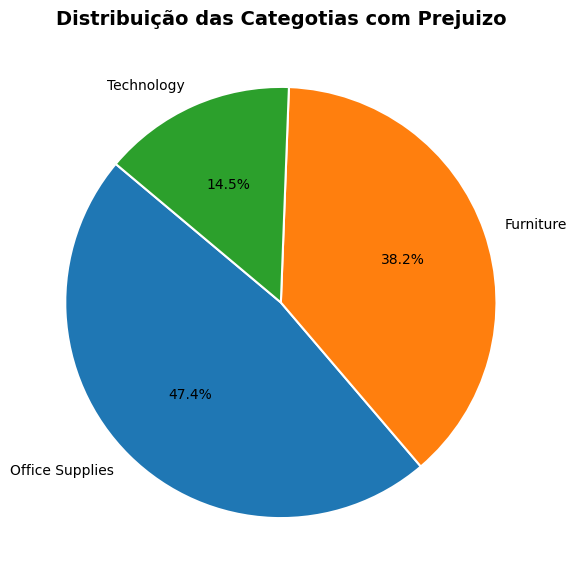

In [14]:
# Conta a frequência de cada segmento e calcula as porcentagens
category_counts = neg["Category"].value_counts()
total = category_counts.sum()
percentages = (category_counts / total * 100).round(1)  # Arredondando para 1 casa decimal

# Cria o gráfico de pizza
plt.figure(figsize=(7, 7))
colors = ["#1f77b4", "#ff7f0e", "#2ca02c"]  # Paleta de cores personalizada

plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', 
        startangle=140, colors=colors, wedgeprops={'edgecolor': 'white', 'linewidth': 1.5})

# Adiciona título
plt.title("Distribuição das Categotias com Prejuizo", fontsize=14, fontweight="bold")
plt.show()

In [15]:
#Soma o Prezuijo por categoria
soma_prejuizo = neg.groupby('Category')['Profit'].sum().reset_index()
soma_prejuizo

,Category,Profit
0,Furniture,-60936.1090
1,Office Supplies,-56615.2585
2,Technology,-38579.9182


<div style="color: green;">
    
* Mesmo Suprimentos de Escritório ocupando quase 50% do total de vendas negativas, o maior valor de prejuizo está em Móveis
    * Provavelmente os maiores descontos são aplicados para móveis e em seguida Suprimentos de Escritório
- Vamos tentar entender melhor se o desconto está relacionado ao produto ou até mesmo ao clinte fiel
</div>

In [16]:
#Selecionei o nome do primeiro produto com desconto
mesa = df[df['Product Name'] == 'Bretford CR4500 Series Slim Rectangular Table']

In [17]:
mesa.shape

(8, 21)

In [18]:
mesa.head(8)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
24,25,CA-2015-106320,9/25/2015,9/30/2015,Standard Class,EB-13870,Emily Burns,Consumer,United States,Orem,Utah,84057,West,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,1044.6300,3,0.00,240.2649
942,943,CA-2016-142958,12/13/2016,12/20/2016,Standard Class,RW-19630,Rob Williams,Corporate,United States,Torrance,California,90503,West,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,1114.2720,4,0.20,41.7852
1562,1563,US-2017-102890,6/30/2017,6/30/2017,Same Day,SG-20470,Sheri Gordon,Consumer,United States,New York City,New York,10011,East,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,1044.6300,5,0.40,-295.9785
2609,2610,CA-2014-127446,11/25/2014,11/30/2014,Standard Class,MC-17590,Matt Collister,Corporate,United States,Arlington,Texas,76017,Central,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,1218.7350,5,0.30,-121.8735
4192,4193,CA-2015-150875,11/16/2015,11/20/2015,Standard Class,HK-14890,Heather Kirkland,Corporate,United States,Boise,Idaho,83704,West,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,696.4200,2,0.00,160.1766
6438,6439,US-2017-113992,12/14/2017,12/19/2017,Standard Class,LC-16885,Lena Creighton,Consumer,United States,Plano,Texas,75023,Central,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,974.9880,4,0.30,-97.4988
8206,8207,CA-2015-122266,4/26/2015,4/30/2015,Standard Class,SA-20830,Sue Ann Reed,Consumer,United States,Daytona Beach,Florida,32114,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,191.5155,1,0.45,-76.6062


<div style="color: green;">
    
* Temos 8 vendas dessa mesa, algumas com desconto que chegam deixar prejuizo e outras sem desconto, para diferentes clientes, em diferentes regiões
- Vamos criar novas colunas para identificar a porcentagem de lucro que a loja tem sobre a mesa, o valor unitario de venda de cada mesa, para tentarmos entender se o desconto é algum erro, ou está correto

</div>

# Feature Engineer

$$
\text{Unitary} = \frac{\frac{\text{Sales}}{1 - \text{Discount}}}{\text{Quantity}}
$$


In [19]:
df['Unitary'] = (df['Sales']/(1-df['Discount'])/df['Quantity'])

<span style="color: green;">Preço unitario do produto</span>

$$
\text{Lucro\_sem\_desconto} = \frac{\text{Profit}}{\text{Unitary} \times \text{Quantity}} + \text{Discount}
$$

In [20]:
df['Lucro_sem_desconto'] = (df['Profit']/(df['Unitary']*df['Quantity']))+df['Discount']

<span style="color: green;">Porcentagem de lucro da loja sobre o produto antes de aplicar qualquer desconto</span>

$$
\text{Lucro\_com\_desconto} = \frac{\text{Profit}}{\text{Unitary} \times \text{Quantity}}
$$

In [21]:
df['Lucro_com_desconto'] = (df['Profit']/(df['Unitary']*df['Quantity']))

<span style="color: green;">Porcentagem de lucro (ou prejuizo) da loja sobre o produto depois de aplicar o desconto</span>

### Veremos novamente como ficou o caso da mesa

In [22]:
mesa = df[df['Product Name'] == 'Bretford CR4500 Series Slim Rectangular Table']

In [23]:
mesa.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Unitary,Lucro_sem_desconto,Lucro_com_desconto
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,348.21,0.23,-0.22
24,25,CA-2015-106320,9/25/2015,9/30/2015,Standard Class,EB-13870,Emily Burns,Consumer,United States,Orem,Utah,84057,West,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,1044.6300,3,0.00,240.2649,348.21,0.23,0.23
942,943,CA-2016-142958,12/13/2016,12/20/2016,Standard Class,RW-19630,Rob Williams,Corporate,United States,Torrance,California,90503,West,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,1114.2720,4,0.20,41.7852,348.21,0.23,0.03
1562,1563,US-2017-102890,6/30/2017,6/30/2017,Same Day,SG-20470,Sheri Gordon,Consumer,United States,New York City,New York,10011,East,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,1044.6300,5,0.40,-295.9785,348.21,0.23,-0.17
2609,2610,CA-2014-127446,11/25/2014,11/30/2014,Standard Class,MC-17590,Matt Collister,Corporate,United States,Arlington,Texas,76017,Central,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,1218.7350,5,0.30,-121.8735,348.21,0.23,-0.07


<div style="color: green;">
    
- Cada mesa é vendida a 348.21 dolares 
+ Nessa caso especifico a loja lucra 23% sobre a venda de cada mesa
* A loja recebe a mesa do fornecedor por 268.12 dolares
+ Nesse caso para a loja ficar sem lucro só fazendo o repasse a preço de custo o desconto maximo poderia ser 23%
* Porém temos descontos que chegam a 45% sobre o preço da mesa, esse valor de desconto não vem repassado do fornecedor e sim direto da loja, então a loja paga os 23% + 22% do cliente ao fornecedor ficando assim com o prejuizo, nesse caso sitado de $383.03
+ Descartei a opção de ser um erro de digitação em 'Profit', pois as formulas usando o 'Sales', 'Quantity' e 'Discount' batem
</div>

#### Veremos se os descontos são aplicados apenas a clientes que fazem muitas compras, fazendo assim a loja ganhar na quantidade de vendas 

In [26]:
# Todas as comprar do cliente Sean O'Donnell que possuir 45% de desconto sobre a mesa
Sean = df[df['Customer Name'] == "Sean O'Donnell"]

In [28]:
Sean.shape

(15, 24)

In [34]:
Sean.head(15)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Unitary,Lucro_sem_desconto,Lucro_com_desconto
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,348.21,0.23,-0.22
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,13.98,0.29,0.09
3373,3374,CA-2015-161718,12/4/2015,12/10/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Hempstead,New York,11550,East,FUR-FU-10002445,Furniture,Furnishings,"DAX Two-Tone Rosewood/Black Document Frame, De...",28.4400,3,0.00,11.3760,9.48,0.40,0.40
3374,3375,CA-2015-161718,12/4/2015,12/10/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Hempstead,New York,11550,East,FUR-CH-10002372,Furniture,Chairs,Office Star - Ergonomically Designed Knee Chair,364.4100,5,0.10,8.0980,80.98,0.12,0.02
3375,3376,CA-2015-161718,12/4/2015,12/10/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Hempstead,New York,11550,East,TEC-PH-10000376,Technology,Phones,Square Credit Card Reader,39.9600,4,0.00,10.3896,9.99,0.26,0.26
3376,3377,CA-2015-161718,12/4/2015,12/10/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Hempstead,New York,11550,East,FUR-CH-10002965,Furniture,Chairs,Global Leather Highback Executive Chair with P...,361.7640,2,0.10,68.3332,200.98,0.27,0.17
4622,4623,CA-2017-147228,9/9/2017,9/14/2017,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Columbia,Tennessee,38401,South,OFF-SU-10001225,Office Supplies,Supplies,Staple remover,8.8320,3,0.20,-1.9872,3.68,0.02,-0.18
4623,4624,CA-2017-147228,9/9/2017,9/14/2017,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Columbia,Tennessee,38401,South,OFF-PA-10000357,Office Supplies,Paper,Xerox 1888,177.5360,4,0.20,62.1376,55.48,0.48,0.28
4624,4625,CA-2017-147228,9/9/2017,9/14/2017,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Columbia,Tennessee,38401,South,OFF-ST-10000046,Office Supplies,Storage,Fellowes Super Stor/Drawer Files,258.4800,2,0.20,-3.2310,161.55,0.19,-0.01
4625,4626,CA-2017-147228,9/9/2017,9/14/2017,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Columbia,Tennessee,38401,South,FUR-FU-10000023,Furniture,Furnishings,Eldon Wave Desk Accessories,14.1360,3,0.20,4.2408,5.89,0.44,0.24


<span style="color: green;">Vemos que Sean possui 15 comprar na loja em diferentes Categorias</span>

In [36]:
#Soma dos Lucros deixados por Sean O'Donnell
Sean['Profit'].sum()

-81.08580000000005

<span style="color: green;">Mesmo com 15 compras a loja ainda continua no prejuizo com esse cliente</span>

In [37]:
# Todas as comprar do cliente Sheri Gordon
Sheri = df[df['Customer Name'] == "Sheri Gordon"]

In [38]:
Sheri.shape

(14, 24)

In [39]:
Sheri['Profit'].sum()

-119.0105

<div style="color: green;">
    
- Com 14 compras a loja também está em prejuizo com esse outro cliente
+ Certamente isso é algum erro e deve ser analisado a fundo
* A melhor opção seria conversar com a area de negocio 
+ Como no nosso exemplo não temos a area de negocio presente vou supor que o erro foi no coluna 'Discount', onde uma desconto de 0.8 deveria implicar em 8% de desconto e não 80% sendo assim um erro de digitação que deveria ser 0.08
* Optei por não excluir esses 1871 registros com prejuizos, pois não tem a confirmação desse erro e esses dados podem ser fundamentias para a etapa 2 do projeto
</div>

# Distribuição dos Segmentos

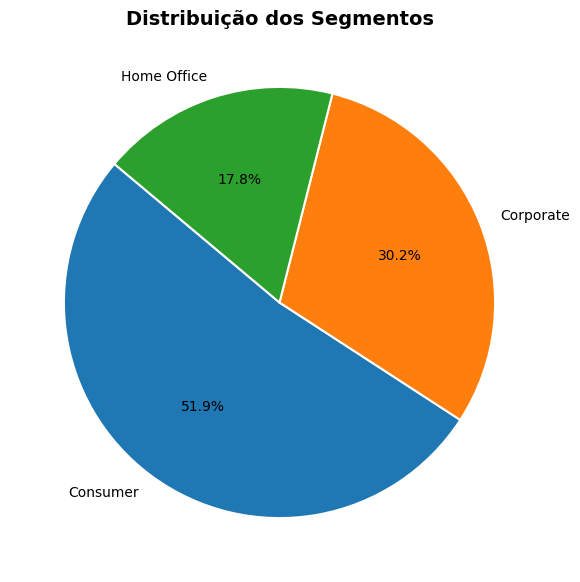

In [42]:
# Contar a frequência de cada segmento e calcular as porcentagens
segment_counts = df["Segment"].value_counts()
total = segment_counts.sum()
percentages = (segment_counts / total * 100).round(1)  # Arredondando para 1 casa decimal

# Criar o gráfico de pizza
plt.figure(figsize=(7, 7))
colors = ["#1f77b4", "#ff7f0e", "#2ca02c"]  # Paleta de cores personalizada

plt.pie(segment_counts, labels=segment_counts.index, autopct='%1.1f%%', 
        startangle=140, colors=colors, wedgeprops={'edgecolor': 'white', 'linewidth': 1.5})

# Adicionar título
plt.title("Distribuição dos Segmentos", fontsize=14, fontweight="bold")

# Exibir o gráfico
plt.show()

<span style="color: green;">Mais de 50% das vendas é feita diretamente ao consumidor 30% para corporações e 17% para escritórios</span>

In [46]:
# Calcular a média do lucro por segmento
media_lucro_segmento = df.groupby('Segment')['Profit'].mean().reset_index()

# Exibir o resultado
media_lucro_segmento

,Segment,Profit
0,Consumer,25.836873
1,Corporate,30.456667
2,Home Office,33.818664


<span style="color: green;">O segmento Home Office mesmo tendo o menor volume de vendas é o segmento onde a média de lucro é maior</span>

In [43]:
df['Country'].value_counts()

Country
United States    9994
Name: count, dtype: int64

In [44]:
df=df.drop('Country',axis=1)

<span style="color: green;">Vamos deletar a coluna "Country" pois ela possui apenas um país para análise </span>

# Distribuição de Categoria

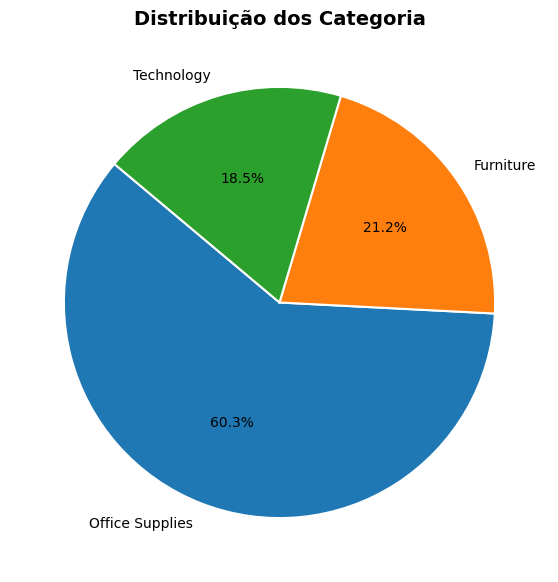

In [45]:
# Contar a frequência de cada segmento e calcular as porcentagens
segment_counts = df["Category"].value_counts()
total = segment_counts.sum()
percentages = (segment_counts / total * 100).round(1)  # Arredondando para 1 casa decimal

# Criar o gráfico de pizza
plt.figure(figsize=(7, 7))
colors = ["#1f77b4", "#ff7f0e", "#2ca02c"]  # Paleta de cores personalizada

plt.pie(segment_counts, labels=segment_counts.index, autopct='%1.1f%%', 
        startangle=140, colors=colors, wedgeprops={'edgecolor': 'white', 'linewidth': 1.5})

# Adicionar título
plt.title("Distribuição dos Categoria", fontsize=14, fontweight="bold")

# Exibir o gráfico
plt.show()

# Distribuição de Sub-Categoria

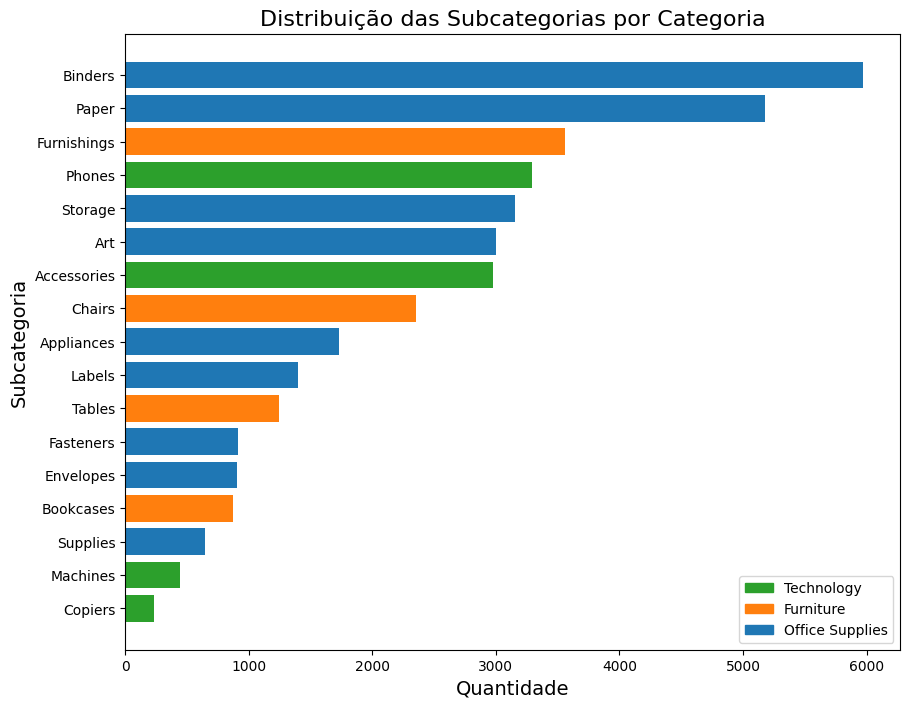

In [48]:
import matplotlib.patches as mpatches

# Filtrar as colunas necessárias
df_plot = df[['Category', 'Sub-Category', 'Quantity']].copy()

# Agrupar por subcategoria somando as quantidades
df_plot = df_plot.groupby(['Category', 'Sub-Category'], as_index=False).sum()

# Ordenar o DataFrame pela quantidade
df_plot = df_plot.sort_values(by='Quantity', ascending=True)

# Definir cores para cada categoria
cores_categoria = {
    'Technology': '#2ca02c',     # Verde
    'Furniture': '#ff7f0e',      # Amarelo
    'Office Supplies': '#1f77b4' # Azul
}

# Atribuir cores com base na categoria
df_plot['Cor'] = df_plot['Category'].map(cores_categoria)

# Configuração do gráfico de barras
plt.figure(figsize=(10, 8))
bars = plt.barh(df_plot['Sub-Category'], df_plot['Quantity'], color=df_plot['Cor'])

# Adicionar legenda corretamente usando Patch
legendas = [mpatches.Patch(color=cor, label=categoria) for categoria, cor in cores_categoria.items()]

# Títulos e rótulos
plt.title('Distribuição das Subcategorias por Categoria', fontsize=16)
plt.xlabel('Quantidade', fontsize=14)
plt.ylabel('Subcategoria', fontsize=14)
plt.legend(handles=legendas)

# Exibir o gráfico
plt.show()

<span style="color: green;">A categoria que mais vende é a Office Supplies com os sub categoria Binders e Paper</span>

### Média de Lucro por Categoria 

In [49]:
# Calcular a média do lucro por segmento
media_lucro_cat = df.groupby('Category')['Profit'].mean().reset_index()
media_lucro_cat

,Category,Profit
0,Furniture,8.699327
1,Office Supplies,20.327050
2,Technology,78.752002


<span style="color: green;">Mesmo a categoria Technology tendo 18% das vendas é a categoria que tem maior média de lucro, lembrando que o lucro negatico está impactando bastante a categoria Furniture</span>

### Soma de Lucro por Categoria 

In [51]:
media_lucro_cat = df.groupby('Category')['Profit'].sum().reset_index()
media_lucro_cat

,Category,Profit
0,Furniture,18451.2728
1,Office Supplies,122490.8008
2,Technology,145454.9481


<span style="color: green;">A categoria Technology é a que traz mais resultado para a loja, tendo menos venda, porém maior média de lucro e maior soma de lucro também</span>

# Distribuição dos Modos de Envio

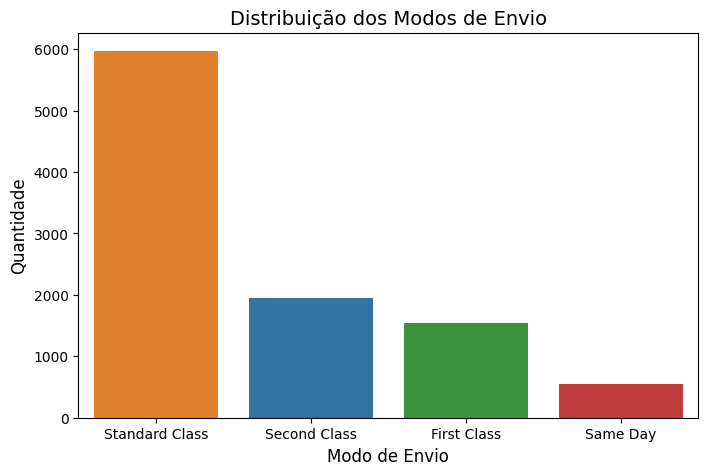

In [53]:
# Contar a frequência de cada Ship Mode e ordenar do maior para o menor
order = df["Ship Mode"].value_counts().index

# Ajuste do tamanho da figura
plt.figure(figsize=(8, 5))

# Criar o gráfico de barras corrigido
sns.countplot(data=df, x="Ship Mode", order=order, hue="Ship Mode", legend=False)

# Adicionar rótulos e título
plt.xlabel("Modo de Envio", fontsize=12)
plt.ylabel("Quantidade", fontsize=12)
plt.title("Distribuição dos Modos de Envio", fontsize=14)

# Exibir o gráfico
plt.show()

<span style="color: green;">Esse era o comportamento esperado para o modo de envio a maior parte dos clientes optam pelo envio padrão, vejamos se o tipo de envio impacta o lucro da venda</span>

In [54]:
# Calcular a média do lucro por Tipo de envio
media_lucro_envio = df.groupby('Ship Mode')['Profit'].mean().reset_index()
media_lucro_envio

,Ship Mode,Profit
0,First Class,31.839948
1,Same Day,29.266591
2,Second Class,29.535545
3,Standard Class,27.494770


<span style="color: green;">A diferença da média de lucro por tipo de envio existe, mas não é um valor tão grande</span>

# Distribuição das Vendas por Estado

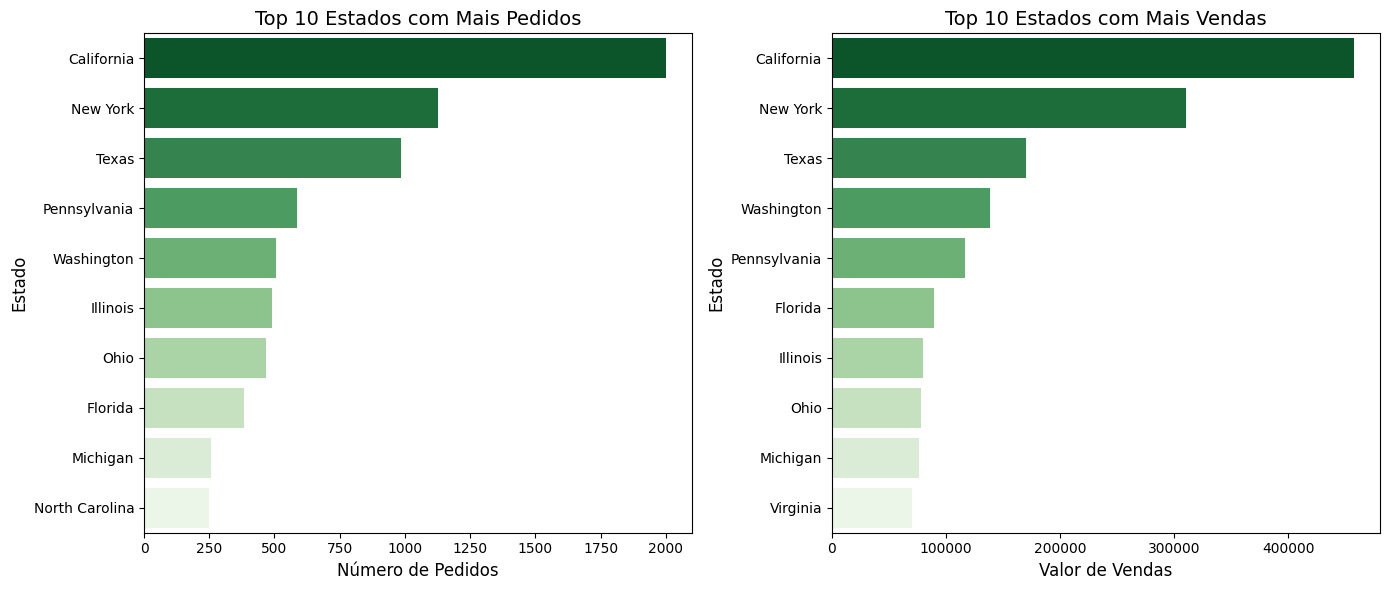

In [55]:
# Agrupar as vendas por cidade e pegar o top 10
top_cities_sales = df.groupby("State")["Sales"].sum().nlargest(10)

# Contar a frequência de pedidos por cidade e pegar o top 10
top_cities_count = df["State"].value_counts().nlargest(10)

# Criar os subplots lado a lado
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Gráfico 1: Número de Pedidos por Cidade (Top 10)
sns.barplot(x=top_cities_count.values, y=top_cities_count.index, palette="Greens_r", ax=axes[0])
axes[0].set_title("Top 10 Estados com Mais Pedidos", fontsize=14)
axes[0].set_xlabel("Número de Pedidos", fontsize=12)
axes[0].set_ylabel("Estado", fontsize=12)

# Gráfico 2: Valor de Vendas por Cidade (Top 10)
sns.barplot(x=top_cities_sales.values, y=top_cities_sales.index, palette="Greens_r", ax=axes[1])
axes[1].set_title("Top 10 Estados com Mais Vendas", fontsize=14)
axes[1].set_xlabel("Valor de Vendas", fontsize=12)
axes[1].set_ylabel("Estado", fontsize=12)

# Ajustar layout
plt.tight_layout()

# Exibir os gráficos
plt.show()

# Distribuição das Vendas por Cidade

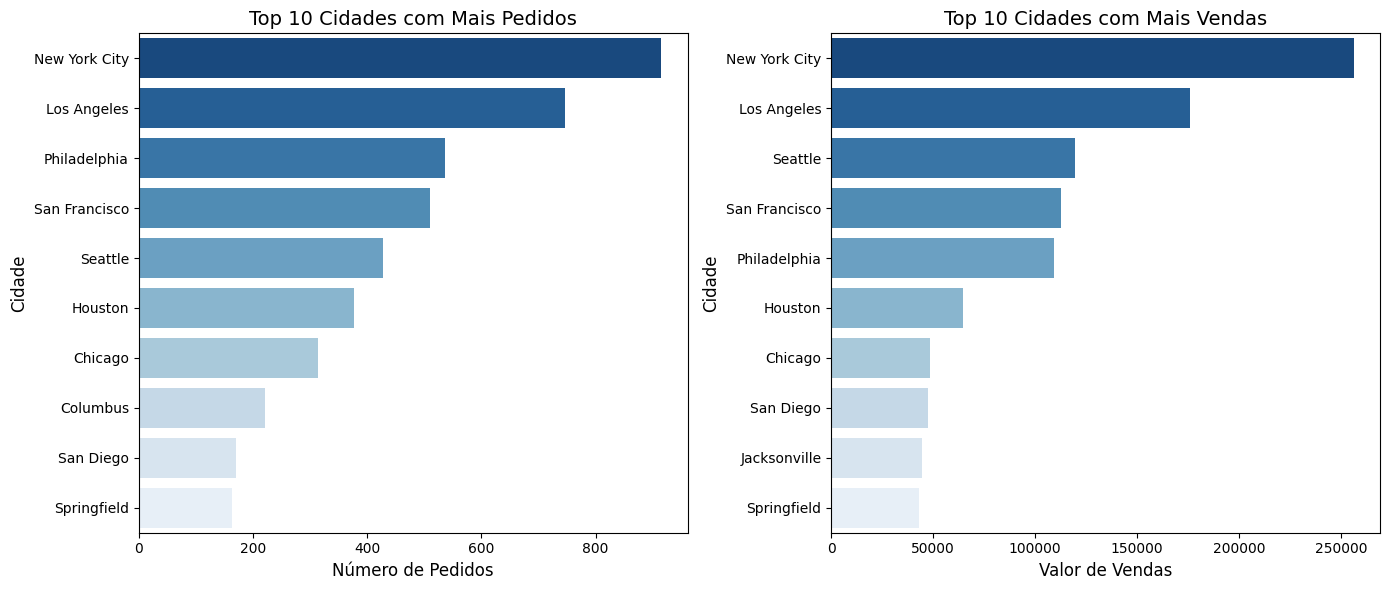

In [56]:
# Agrupar as vendas por cidade e pegar o top 10
top_cities_sales = df.groupby("City")["Sales"].sum().nlargest(10)

# Contar a frequência de pedidos por cidade e pegar o top 10
top_cities_count = df["City"].value_counts().nlargest(10)

# Criar os subplots lado a lado
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Gráfico 1: Número de Pedidos por Cidade (Top 10)
sns.barplot(x=top_cities_count.values, y=top_cities_count.index, palette="Blues_r", ax=axes[0])
axes[0].set_title("Top 10 Cidades com Mais Pedidos", fontsize=14)
axes[0].set_xlabel("Número de Pedidos", fontsize=12)
axes[0].set_ylabel("Cidade", fontsize=12)

# Gráfico 2: Valor de Vendas por Cidade (Top 10)
sns.barplot(x=top_cities_sales.values, y=top_cities_sales.index, palette="Blues_r", ax=axes[1])
axes[1].set_title("Top 10 Cidades com Mais Vendas", fontsize=14)
axes[1].set_xlabel("Valor de Vendas", fontsize=12)
axes[1].set_ylabel("Cidade", fontsize=12)

# Ajustar layout
plt.tight_layout()

# Exibir os gráficos
plt.show()


<div style="color: green;">
    
- Os Estados com maior numero de pedidos e maior valor de vendas são Califórnia, New York e Texas
+ A cidade de New York possui maior numero de pedidos e maior valor de vendas seguida de Los Angeles
* O Estados da Califórnia só fica a frente de New Iork, pois possui duas cidades com alto valume de compras Sao Francisco e Los Angeles
</div>

In [63]:
#Amostra dos dados
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Unitary,Lucro_sem_desconto,Lucro_com_desconto,Order Month,Order Year
0,1,CA-2016-152156,2016-11-08,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,130.98,0.16,0.16,11,2016
1,2,CA-2016-152156,2016-11-08,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,243.98,0.30,0.30,11,2016
2,3,CA-2016-138688,2016-06-12,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,7.31,0.47,0.47,6,2016
3,4,US-2015-108966,2015-10-11,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,348.21,0.23,-0.22,10,2015
4,5,US-2015-108966,2015-10-11,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,13.98,0.29,0.09,10,2015


### Vamos modificar o formato das datas e verificar qual o melhor periodo de vendas

In [61]:
# Converter para datetime
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%m/%d/%Y')  
# Criar a coluna com o mês
df['Order Month'] = df['Order Date'].dt.month  
# Criar a coluna com o ano
df['Order Year'] = df['Order Date'].dt.year    

# Soma de Vendas por Ano

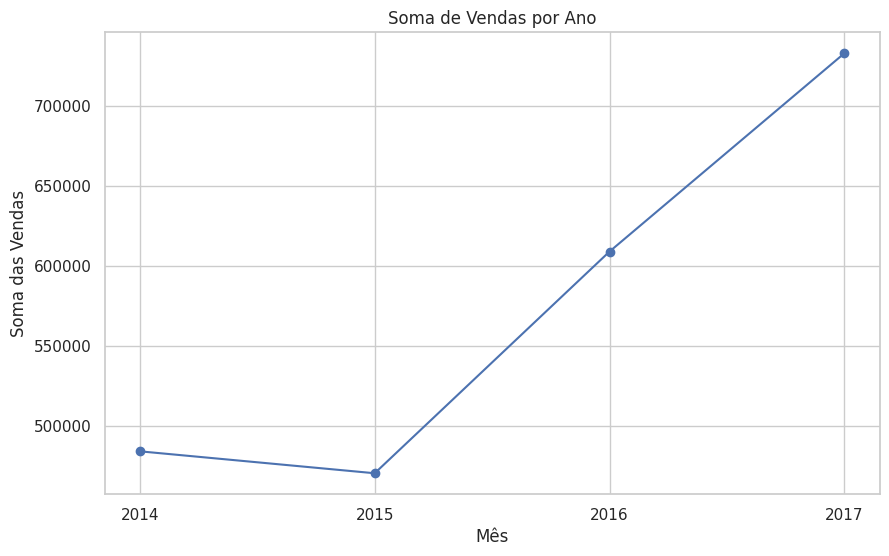

In [71]:
# Agrupar e somar as vendas por mês
df_monthly_sales = df.groupby('Order Year')['Sales'].sum().reset_index()

# Ordenar os meses
df_monthly_sales = df_monthly_sales.sort_values('Order Year')

# Criar o gráfico
plt.figure(figsize=(10, 6))
plt.plot(df_monthly_sales['Order Year'], df_monthly_sales['Sales'], marker='o', linestyle='-', color='b')
plt.title('Soma de Vendas por Ano')
plt.xlabel('Mês')
plt.ylabel('Soma das Vendas')
plt.xticks(df_monthly_sales['Order Year'])
plt.grid(True)
plt.show()

<span style="color: green;">O volume de vendas aumentou muito desde 2015 até 2017</span>

# Soma de Vendas por Mês

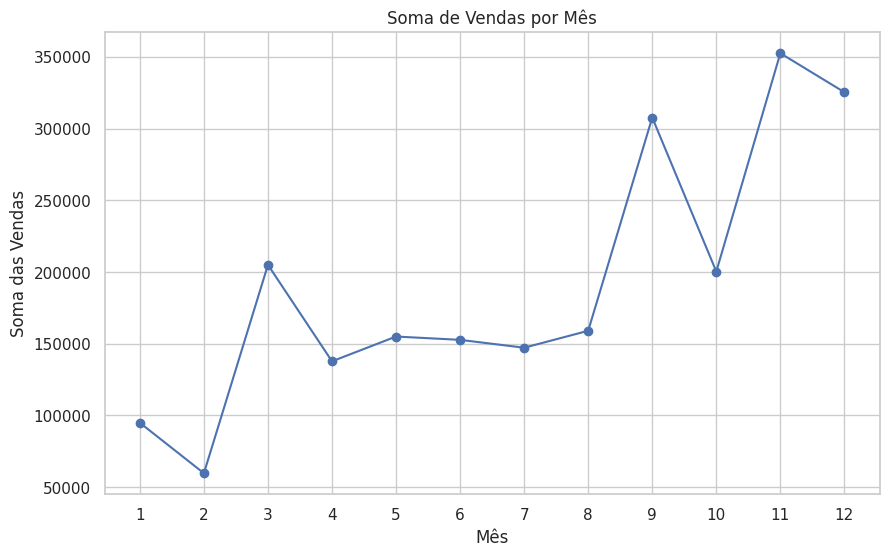

In [69]:
# Agrupar e somar as vendas por mês
df_monthly_sales = df.groupby('Order Month')['Sales'].sum().reset_index()

# Ordenar os meses
df_monthly_sales = df_monthly_sales.sort_values('Order Month')

# Criar o gráfico
plt.figure(figsize=(10, 6))
plt.plot(df_monthly_sales['Order Month'], df_monthly_sales['Sales'], marker='o', linestyle='-', color='b')
plt.title('Soma de Vendas por Mês')
plt.xlabel('Mês')
plt.ylabel('Soma das Vendas')
plt.xticks(df_monthly_sales['Order Month'])
plt.grid(True)
plt.show()

<span style="color: green;">Como esperado Novembro e Dezembro são os meses com mais vendas, por conta de festas de fim de ano e Black Friday, também temos um pico de vendas em setembro, janeiro as vendas enfraquecem reaquecendo novamento em março</span>

# Soma de vendas por Mês e Categoria

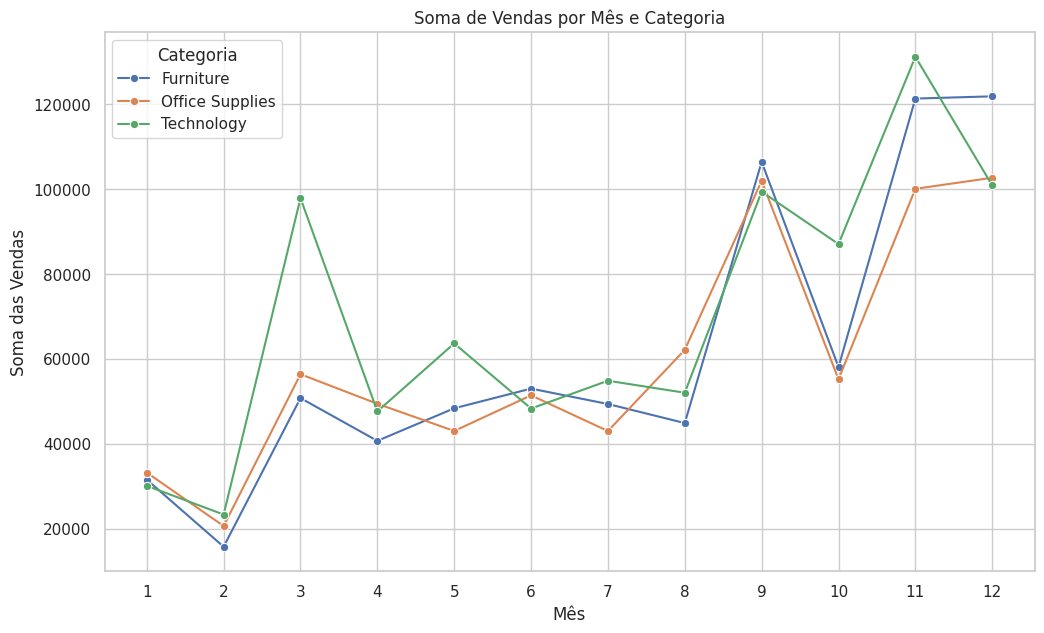

In [73]:
# Agrupar e somar as vendas por mês e categoria
df_monthly_category_sales = df.groupby(['Order Month', 'Category'])['Sales'].sum().reset_index()

# Configurar o estilo
sns.set_theme(style="whitegrid")

# Criar o gráfico de linhas
plt.figure(figsize=(12, 7))
sns.lineplot(data=df_monthly_category_sales, x='Order Month', y='Sales', hue='Category', marker='o')

# Configurar títulos e rótulos
plt.title('Soma de Vendas por Mês e Categoria')
plt.xlabel('Mês')
plt.ylabel('Soma das Vendas')
plt.xticks(df_monthly_category_sales['Order Month'].unique())
plt.legend(title='Categoria')
plt.show()

# Conclusões Finais

<div style="color: green;">

* O motivo da média de lucro ser tão baixa em relação ao desvio padrão é que o maior volume de vendas está em produtos mais baratos e com uma margem de lucro menor

- Seria interessa revisar os descontos dados principalmente para Furniture

+ Vemos no ultimo grafico que as vendas por categoria são parecidas durante o ano, mas em março a um pico de vendas para Technologia
    + Technologia é a categoria que mais da lucro a loja, vale considerar ficar campanhas de marketing em Technologias no começo do ano
    + Faremos agora no projeto 2 uma seguimentação de clientes para as campanhas de marketing mais direcionadas e mais acertivas
</div>

In [77]:
#Salvar as modificações para usar no projeto 2
df.to_csv('df.csv', index=False, encoding='ISO-8859-1')